In [3]:
# 데이터 분석 관련 라이브러리
import pandas as pd  # 데이터 프레임 처리
import numpy as np  # 배열, 행렬 연산

# 시각화 관련 라이브러리
import matplotlib.pyplot as plt  # 기본적인 시각화
import seaborn as sns  # 고급 시각화
import matplotlib.font_manager as fm  # 폰트 설정
from matplotlib import rcParams  # 설정 관리

# 맥북에서 한글 설정 (matplotlib에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 기본 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 머신러닝 관련 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 스케일러
from sklearn.linear_model import LinearRegression, LogisticRegression  # 선형 회귀, 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # 결정 트리
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # 랜덤 포레스트
from sklearn.svm import SVC, SVR  # 서포트 벡터 머신
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report  # 성능 평가

# 통계 관련 라이브러리
import statsmodels.api as sm  # 통계 모델링
import scipy.stats as stats  # 통계 함수

# 기타 라이브러리
import os  # 운영체제 관련 기능
import sys  # 시스템 관련 기능
import re  # 정규 표현식
import json  # JSON 파일 처리
import datetime  # 날짜 및 시간 처리
import pickle  # 객체 직렬화 및 역직렬화
import requests  # HTTP 요청
import random  # 난수 생성
import math  # 수학 함수


In [ ]:

# import os
# import pandas as pd

# # 파일이 있는 폴더와 저장할 폴더 경로 설정
# input_folder = '/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시매물데이터전처리'
# output_folder = '/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시부동산매물데이터_컬럼및전처리'

# # 저장할 폴더가 없으면 생성
# os.makedirs(output_folder, exist_ok=True)

# # 폴더 내 모든 csv 파일을 읽고 전처리한 후 저장하는 코드
# for file_name in os.listdir(input_folder):
#     if file_name.endswith('.csv'):
#         # CSV 파일 읽기
#         file_path = os.path.join(input_folder, file_name)
#         df = pd.read_csv(file_path)
        
#         # 공급면적, 전용면적, 현재층, 총층을 추출하는 함수
#         def extract_areas_and_floors(area_str):
#             area_str = area_str.split(', ')
#             supply_area, exclusive_area = area_str[0].split('/')
#             current_floor, total_floors = area_str[1].split('/')
#             return supply_area, exclusive_area, current_floor, total_floors

#         # 가격에서 보증금과 월세를 추출하는 함수
#         def extract_deposit_and_rent(price_str):
#             if '억' in price_str:  # 매매인 경우
#                 return price_str, None  # 매매가로 설정, 월세는 없음
#             else:
#                 parts = price_str.split('/')
#                 if len(parts) == 2:
#                     return parts[0], parts[1]  # 보증금과 월세
#                 else:
#                     return price_str, None  # 월세가 없는 경우

#         # 공급면적, 전용면적, 현재층, 총층 컬럼 추가
#         df[['공급면적', '전용면적', '현재층', '총층']] = df['면적 및 층수'].apply(lambda x: pd.Series(extract_areas_and_floors(x)))

#         # 공급종류, 보증금, 월세 컬럼 추가
#         df['공급종류'] = df['가격'].apply(lambda x: '매매' if '억' in x else '월세')
#         df[['보증금', '월세']] = df['가격'].apply(lambda x: pd.Series(extract_deposit_and_rent(x)))

#         # 매매인 경우 보증금과 월세를 NaN으로 설정하고, 매매가 컬럼을 추가
#         df['보증금'] = df.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['보증금'], axis=1)
#         df['월세'] = df.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['월세'], axis=1)

#         # 매매가 컬럼 추가
#         df['매매가'] = df.apply(lambda row: row['가격'] if row['공급종류'] == '매매' else np.nan, axis=1)
        
#         # '전용면적'에서 숫자만 남기고 제곱기호(²) 제거
#         df['전용면적'] = df['전용면적'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
#         df['전용면적'] = df['전용면적'].str.replace('²', '', regex=False)
        
#         # '총층'에서 지하층(B1, B2 등)을 포함하여 숫자만 남기고 나머지 문자열 제거
#         df['총층'] = df['총층'].apply(lambda x: ''.join(filter(str.isdigit, str(x))) if 'B' not in str(x) else str(x))
        
#         # 전처리된 데이터 CSV로 저장
#         output_file_path = os.path.join(output_folder, file_name)
#         df.to_csv(output_file_path, index=False)

# output_folder


'/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시부동산매물데이터_컬럼및전처리'

### 모든 매물데이터 concat

In [ ]:
# # 전처리된 전체 파일이 있는 폴더 경로 설정
# processed_folder = '/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/부동산매물데이터_컬럼및전처리'

# # 폴더 내 모든 CSV 파일을 읽고 하나의 DataFrame으로 합치기
# all_files = [file for file in os.listdir(processed_folder) if file.endswith('.csv')]

# # 각 파일을 읽어와서 하나의 리스트로 저장
# dfs = []
# for file_name in all_files:
#     file_path = os.path.join(processed_folder, file_name)
#     df = pd.read_csv(file_path)
#     dfs.append(df)

# # 리스트에 저장된 DataFrame을 하나로 합치기
# merged_df = pd.concat(dfs, ignore_index=True)

# merged_df


,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,500/45,"238/144m², 5/12층",-,238,144,5,12,월세,500,45.0,NaN
1,지식산업센터,"3억 4,000","238/144m², 7/12층",-,238,144,7,12,매매,NaN,NaN,"3억 4,000"
2,지식산업센터,"1,500/140","238/144m², 7/12층",-,238,144,7,12,월세,"1,500",140.0,NaN
3,지식산업센터,"1,300/130","238/144m², 5/12층",-,238,144,5,12,월세,"1,300",130.0,NaN
4,지식산업센터,"5,660/566","667/485m², 5/6층",오전동 150-24 공장 ((주)에이엘티),667,485,5,6,월세,"5,660",566.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
598,지식산업센터,"1,000/90","142/71m², 13/14층",에이스 하이테크시티군포,142,71,13,14,월세,"1,000",90.0,NaN
599,지식산업센터,800/80,"122/61m², 13/14층",에이스 하이테크시티군포,122,61,13,14,월세,800,80.0,NaN
600,지식산업센터,"2,000/180","340/209m², 5/12층",한솔테크노타운,340,209,5,12,월세,"2,000",180.0,NaN
601,지식산업센터,"2,500/250","438/298m², 6/8층",금봉테크노벨리아파트형공장,438,298,6,8,월세,"2,500",250.0,NaN


In [115]:
merged_df = pd.read_csv('/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시/성남시_데이터_1차가공.csv')

In [116]:
merged_df

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,"19억 8,000","679/342m², 3/15층",성남 SK V1 tower,679,342,3,15,매매,NaN,NaN,"19억 8,000"
1,지식산업센터,"1억 3,000/1,100","1504/873m², 1/7층",중앙인더스피아3,1504,873,1,7,매매,NaN,NaN,"1억 3,000/1,100"
2,지식산업센터,"1,500/150","257/128m², 13/16층",성남 센트럴비즈타워 2차,257,128,13,16,월세,"1,500",150.0,NaN
3,지식산업센터,"2,000/190","219/110m², 1/16층",성남 센트럴비즈타워 2차,219,110,1,16,월세,"2,000",190.0,NaN
4,지식산업센터,"2,000/150","246/128m², 11/13층",중앙이노테크 지식산업센터,246,128,11,13,월세,"2,000",150.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
888,지식산업센터,"4,000/320","426/298m², 5/9층",정보없음,426,298,5,9,월세,"4,000",320.0,NaN
889,지식산업센터,"2,000/170","215/150m², 8/9층",정보없음,215,150,8,9,월세,"2,000",170.0,NaN
890,지식산업센터,"1억 2,000","74/54m², B2/9층",분당테크노파크C동,74,54,B2,9,매매,NaN,NaN,"1억 2,000"
891,지식산업센터,"1억 4,000","55/33m², 6/7층",정보없음,55,33,6,7,매매,NaN,NaN,"1억 4,000"


In [117]:
merged_df

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,"19억 8,000","679/342m², 3/15층",성남 SK V1 tower,679,342,3,15,매매,NaN,NaN,"19억 8,000"
1,지식산업센터,"1억 3,000/1,100","1504/873m², 1/7층",중앙인더스피아3,1504,873,1,7,매매,NaN,NaN,"1억 3,000/1,100"
2,지식산업센터,"1,500/150","257/128m², 13/16층",성남 센트럴비즈타워 2차,257,128,13,16,월세,"1,500",150.0,NaN
3,지식산업센터,"2,000/190","219/110m², 1/16층",성남 센트럴비즈타워 2차,219,110,1,16,월세,"2,000",190.0,NaN
4,지식산업센터,"2,000/150","246/128m², 11/13층",중앙이노테크 지식산업센터,246,128,11,13,월세,"2,000",150.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
888,지식산업센터,"4,000/320","426/298m², 5/9층",정보없음,426,298,5,9,월세,"4,000",320.0,NaN
889,지식산업센터,"2,000/170","215/150m², 8/9층",정보없음,215,150,8,9,월세,"2,000",170.0,NaN
890,지식산업센터,"1억 2,000","74/54m², B2/9층",분당테크노파크C동,74,54,B2,9,매매,NaN,NaN,"1억 2,000"
891,지식산업센터,"1억 4,000","55/33m², 6/7층",정보없음,55,33,6,7,매매,NaN,NaN,"1억 4,000"


In [118]:
# merged_df.to_csv('./의왕_군포시_데이터_1차가공.csv', index=False, encoding='utf-8-sig')

In [119]:
성남시_데이터_1차가공 = merged_df.copy()

### 지산데이터랑 지산매물데이터랑 합치기 (공실률이랑 관계를 보기 위한)

In [120]:
지산데이터 = pd.read_csv('/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시/성남시_전처리_지산.csv', encoding='utf-8-sig')

In [121]:
지산데이터['지식산업센터명칭'].value_counts()

지식산업센터명칭
LH기업성장센터        1
SK V1           1
시콕스타워           1
쌍용IT트윈타워1차      1
쌍용IT트윈타워2차      1
우림라이온스밸리 1차     1
우림라이온스밸리 2차     1
우림라이온스밸리 3차     1
우림라이온스밸리 5차     1
이노트리            1
자생메디바이오센터       1
중앙이노테크          1
중앙인더스피아         1
중앙인더스피아 3차      1
중앙인더스피아 5차      1
중앙인더스피아2차       1
중일아인스프라츠 3차     1
크란츠테크노          1
판교IT센터          1
판교이노베이션랩        1
포스테크노           1
한라시그마밸리         1
현대I밸리           1
스타타워            1
스타우드            1
성남센트럴비즈타워2차     1
델리스지식산업센터       1
SK엔테크노파크        1
SK지식산업센터        1
SW드림타운          1
경기기업성장센터        1
글로벌Biz센터        1
금강펜테리움IT타워      1
금강하이테크밸리        1
금강하이테크밸리2차      1
노벨테크노타워         1
드림테크노           1
성남센트럴비즈타워       1
반도아이비밸리         1
반포테크노피아         1
벽산테크노피아         1
분당테크노파크         1
선일테크노피아         1
선텍시티            1
선텍시티2차          1
성남 센터엠          1
성남글로벌융합센터       1
현대지식산업센터성남고등    1
Name: count, dtype: int64

In [122]:
성남시_데이터_1차가공['센터명칭'].value_counts()

센터명칭
성남 센트럴비즈타워 2차      86
성남 SK V1 tower     70
금강펜테리움IT타워         55
성남 우림라이온스밸리3차      51
성남 센터엠 지식산업센터      49
성남 우림 라이온스밸리 2차    43
벽산테크노피아            42
SKⓝ테크노파크           41
한라시그마밸리            40
성남 우림 라이온스밸리 5차    38
중앙인더스피아3           36
정보없음               30
크란츠 테크노            29
성남우림라이온스밸리1차       29
금강하이테크밸리           27
반포테크노피아            23
포스테크노              22
중앙이노테크 지식산업센터      21
성남 현대 I밸리          21
성남 센트럴비즈타워 1차      19
SICOX TOWER        18
드림테크노아파트형공장        12
선텍시티아파트형공장         11
쌍용IT트윈타워 B동        11
STARWOOD아파트형공장      8
노벨아파트형공장            8
아세아도                7
쌍용IT트윈타워 A동         7
금강하이테크2 아파트형공장      7
-                   5
중앙인더스피아             5
스타타워 아파트형공장         4
SK지식산업센터            3
선텍시티Ⅱ 아파트형공장        3
분당테크노파크C동           3
중앙인더스피아5차           2
중앙인더스피아2아파트형공장      2
선일테크노피아             2
주식회사 성우메디텍          1
두손미디어공장             1
성남산단3단지             1
Name: count, dtype: int64

### 지식산업명칭 전처리

In [123]:
# 이름 변경을 위한 딕셔너리
rename_dict = {
    "성남 센트럴비즈타워 2차": "성남센트럴비즈타워2차",
    "성남 SK V1 tower": "SK V1",
    "성남 우림라이온스밸리3차": "우림라이온스밸리 3차",
    "성남 센터엠 지식산업센터": "성남 센터엠",
    "성남 우림 라이온스밸리 2차": "우림라이온스밸리 2차",
    "성남 우림 라이온스밸리 5차": "우림라이온스밸리 5차",
    "SKⓝ테크노파크": "SK엔테크노파크",
    "SICOX TOWER": "시콕스타워",
    "드림테크노아파트형공장": "드림테크노",
    "쌍용IT트윈타워 B동": "쌍용IT트윈타워2차",
    "쌍용IT트윈타워 A동": "쌍용IT트윈타워1차",
    "중앙이노테크 지식산업센터": "중앙이노테크",
    "금강하이테크2 아파트형공장": "금강하이테크밸리2차"
}

# 데이터프레임에 적용
성남시_데이터_1차가공["센터명칭"] = 성남시_데이터_1차가공["센터명칭"].replace(rename_dict)


In [124]:
성남시_데이터_1차가공['센터명칭'].value_counts()


센터명칭
성남센트럴비즈타워2차       86
SK V1             70
금강펜테리움IT타워        55
우림라이온스밸리 3차       51
성남 센터엠            49
우림라이온스밸리 2차       43
벽산테크노피아           42
SK엔테크노파크          41
한라시그마밸리           40
우림라이온스밸리 5차       38
중앙인더스피아3          36
정보없음              30
크란츠 테크노           29
성남우림라이온스밸리1차      29
금강하이테크밸리          27
반포테크노피아           23
포스테크노             22
중앙이노테크            21
성남 현대 I밸리         21
성남 센트럴비즈타워 1차     19
시콕스타워             18
드림테크노             12
선텍시티아파트형공장        11
쌍용IT트윈타워2차        11
STARWOOD아파트형공장     8
노벨아파트형공장           8
아세아도               7
쌍용IT트윈타워1차         7
금강하이테크밸리2차         7
-                  5
중앙인더스피아            5
스타타워 아파트형공장        4
SK지식산업센터           3
선텍시티Ⅱ 아파트형공장       3
분당테크노파크C동          3
중앙인더스피아5차          2
중앙인더스피아2아파트형공장     2
선일테크노피아            2
주식회사 성우메디텍         1
두손미디어공장            1
성남산단3단지            1
Name: count, dtype: int64

### 머지하기 

In [125]:
# 3. 두 데이터프레임 병합 (의왕_군포시_데이터_1차가공의 '센터명칭'과 지산데이터의 '지식산업센터명칭'을 기준)
성남시_데이터_1차가공 = 성남시_데이터_1차가공.merge(
    지산데이터,
    left_on='센터명칭',
    right_on='지식산업센터명칭',
    how='left'  # 혹은 'inner' 등 상황에 맞게 선택
)

In [126]:
성남시_데이터_1차가공.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   이름           893 non-null    object 
 1   가격           893 non-null    object 
 2   면적 및 층수      893 non-null    object 
 3   센터명칭         893 non-null    object 
 4   공급면적         893 non-null    int64  
 5   전용면적         893 non-null    int64  
 6   현재층          893 non-null    object 
 7   총층           893 non-null    int64  
 8   공급종류         893 non-null    object 
 9   보증금          551 non-null    object 
 10  월세           551 non-null    float64
 11  매매가          342 non-null    object 
 12  지식산업센터명칭     673 non-null    object 
 13  경도_x         673 non-null    float64
 14  위도_x         673 non-null    float64
 15  소재지도로명주소_x   673 non-null    object 
 16  건축사용승인       673 non-null    object 
 17  용도지역_x       673 non-null    object 
 18  건축연면적(제곱미터)  673 non-null    float64
 19  유치가능업체수_

In [130]:
# 데이터프레임에서 개수가 0인 컬럼 삭제
columns_to_drop = [
    "부지면적(㎡)", "층수(지하/지상)", "공장시설면적(㎡)", "기타산업시설면적(㎡)",
    "지원시설면적(㎡)", "공동시설면적(㎡)", "공장동수", "분양형태", "준공일자"
]

# 중복된 컬럼 제거 (동일한 의미를 가진 컬럼이 있으면 하나만 유지)
deduplicated_df = 성남시_데이터_1차가공.drop(columns=columns_to_drop)

# '_x', '_y' 접미사 제거하여 컬럼명 정리
deduplicated_df.columns = [col.replace('_x', '').replace('_y', '') for col in deduplicated_df.columns]
성남시_데이터_1차가공 = deduplicated_df.copy()

In [131]:
# 공실률데이터가 nan인 경우 그 행 삭제

성남시_데이터_1차가공 = 성남시_데이터_1차가공.dropna(subset=['공실률(%)'])

In [132]:
성남시_데이터_1차가공.info()

<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 0 to 876
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   이름           673 non-null    object 
 1   가격           673 non-null    object 
 2   면적 및 층수      673 non-null    object 
 3   센터명칭         673 non-null    object 
 4   공급면적         673 non-null    int64  
 5   전용면적         673 non-null    int64  
 6   현재층          673 non-null    object 
 7   총층           673 non-null    int64  
 8   공급종류         673 non-null    object 
 9   보증금          417 non-null    object 
 10  월세           417 non-null    float64
 11  매매가          256 non-null    object 
 12  지식산업센터명칭     673 non-null    object 
 13  경도           673 non-null    float64
 14  위도           673 non-null    float64
 15  소재지도로명주소     673 non-null    object 
 16  건축사용승인       673 non-null    object 
 17  용도지역         673 non-null    object 
 18  건축연면적(제곱미터)  673 non-null    float64
 19  유치가능업체수      

In [ ]:
# # 데이터에서 Null 값이 많은 컬럼 제거 (_x, _y 중복 컬럼 포함)
# columns_to_drop = [
#     "매매가", "준공일자_x", "부지면적(㎡)", "층수(지하/지상)", "공장시설면적(㎡)", "기타산업시설면적(㎡)",
#     "지원시설면적(㎡)", "공동시설면적(㎡)", "공장동수", "분양형태", "준공일자_y"
# ]

# # 컬럼 이름 정리 (_x, _y 제거)
# cleaned_df = 성남시_데이터_1차가공.drop(columns=columns_to_drop)

# # '_x', '_y' 접미사 제거
# cleaned_df.columns = [col.replace('_x', '').replace('_y', '') for col in cleaned_df.columns]
# 성남시_데이터_1차가공 = cleaned_df.copy()


In [135]:
성남시_데이터_1차가공['보증금'].value_counts()

보증금
1500.0    110
2000.0     98
1000.0     88
3000.0     61
4000.0     28
9000.0      5
3500.0      5
5000.0      4
500.0       4
8500.0      4
7500.0      2
7000.0      2
2500.0      2
8000.0      1
4500.0      1
6000.0      1
1300.0      1
Name: count, dtype: int64

### 컬럼들 정제

In [134]:
import pandas as pd
import numpy as np

# 날짜형 컬럼 변환
date_cols = ['허가일자', '착공일자', '준공일자', '사용승인일', '데이터기준일자']
for col in date_cols:
    if col in 성남시_데이터_1차가공.columns:
        성남시_데이터_1차가공[col] = pd.to_datetime(성남시_데이터_1차가공[col], errors='coerce')

# 가격 컬럼 변환 (예: "9억" → 900,000,000)
def convert_price(price):
    if pd.isnull(price):
        return price
    if isinstance(price, str):
        price = price.strip().replace(',', '')  # 콤마 제거
        if price.endswith('억'):
            try:
                num = float(price.replace('억', '').strip())
                return num * 100000000
            except:
                return np.nan
        try:
            return float(price)
        except:
            return np.nan
    return price

if '가격' in 성남시_데이터_1차가공.columns:
    성남시_데이터_1차가공['가격'] = 성남시_데이터_1차가공['가격'].apply(convert_price)

# 숫자로 변환할 컬럼들
numeric_cols = ['공급면적', '전용면적', '현재층', '총층', '입주업체수', '공장동수', '공실률', '보증금']
for col in numeric_cols:
    if col in 성남시_데이터_1차가공.columns:
        성남시_데이터_1차가공[col] = 성남시_데이터_1차가공[col].astype(str).str.replace(',', '', regex=True)
        성남시_데이터_1차가공[col] = pd.to_numeric(성남시_데이터_1차가공[col], errors='coerce')



### 평당 월세 , 평수계산 , 연면적계산


In [139]:

pd.set_option('display.max_columns', None)
성남시_데이터_1차가공.head()

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가,지식산업센터명칭,경도,위도,소재지도로명주소,건축사용승인,용도지역,건축연면적(제곱미터),유치가능업체수,공실률(%),시군명,건축면적(㎡),입주업체수,착공일자,평당 월 임대료
0,지식산업센터,NaN,"679/342m², 3/15층",SK V1,679,342,3.0,15,매매,NaN,NaN,"19억 8,000",SK V1,127.173858,37.439507,경기도 성남시 중원구 갈마치로288번길 14,2019.11.,일반공업,140396.0,823.0,74.726610,성남시,140396.0,216.0,2016-09-01,NaN
2,지식산업센터,NaN,"257/128m², 13/16층",성남센트럴비즈타워2차,257,128,13.0,16,월세,1500.0,150.0,NaN,성남센트럴비즈타워2차,127.174133,37.438660,경기도 성남시 중원구 사기막골로 99,2022.08.,일반공업,94472.0,519.0,72.061657,성남시,94465.0,144.0,2020-02-13,0.583658
3,지식산업센터,NaN,"219/110m², 1/16층",성남센트럴비즈타워2차,219,110,1.0,16,월세,2000.0,190.0,NaN,성남센트럴비즈타워2차,127.174133,37.438660,경기도 성남시 중원구 사기막골로 99,2022.08.,일반공업,94472.0,519.0,72.061657,성남시,94465.0,144.0,2020-02-13,0.867580
4,지식산업센터,NaN,"246/128m², 11/13층",중앙이노테크,246,128,11.0,13,월세,2000.0,150.0,NaN,중앙이노테크,127.177739,37.441293,경기도 성남시 중원구 사기막골로 148,2013.07.,일반공업,41379.0,157.0,57.961783,성남시,41379.0,63.0,2011-10-10,0.609756
6,지식산업센터,500000000.0,"161/81m², 15/20층",SK V1,161,81,15.0,20,매매,NaN,NaN,5억,SK V1,127.173858,37.439507,경기도 성남시 중원구 갈마치로288번길 14,2019.11.,일반공업,140396.0,823.0,74.726610,성남시,140396.0,216.0,2016-09-01,NaN


In [140]:

# # 공급면적을 평(㎡ -> 평)으로 변환 (1평 = 3.3058㎡)
성남시_데이터_1차가공["공급면적(평)"] = 성남시_데이터_1차가공["공급면적"] / 3.3058

# 전용면적을 평으로 변환
성남시_데이터_1차가공["전용면적(평)"] = 성남시_데이터_1차가공["전용면적"] / 3.3058

# 연면적 계산 (건축면적 * 총층)
성남시_데이터_1차가공["연면적(㎡)"] = 성남시_데이터_1차가공["건축면적(㎡)"] * 성남시_데이터_1차가공["총층"]
성남시_데이터_1차가공["연면적(평)"] = 성남시_데이터_1차가공["연면적(㎡)"] / 3.3058

# 평당 월 임대료 계산 (월세 / 공급면적(평)), 월세 데이터가 존재하지 않으므로 임의 값 설정 필요
성남시_데이터_1차가공["평당 월 임대료"] = 성남시_데이터_1차가공["월세"] / 성남시_데이터_1차가공["공급면적"]


In [141]:
성남시_데이터_1차가공.head()

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가,지식산업센터명칭,경도,위도,소재지도로명주소,건축사용승인,용도지역,건축연면적(제곱미터),유치가능업체수,공실률(%),시군명,건축면적(㎡),입주업체수,착공일자,평당 월 임대료,공급면적(평),전용면적(평),연면적(㎡),연면적(평)
0,지식산업센터,NaN,"679/342m², 3/15층",SK V1,679,342,3.0,15,매매,NaN,NaN,"19억 8,000",SK V1,127.173858,37.439507,경기도 성남시 중원구 갈마치로288번길 14,2019.11.,일반공업,140396.0,823.0,74.726610,성남시,140396.0,216.0,2016-09-01,NaN,205.396576,103.454534,2105940.0,637043.983302
2,지식산업센터,NaN,"257/128m², 13/16층",성남센트럴비즈타워2차,257,128,13.0,16,월세,1500.0,150.0,NaN,성남센트럴비즈타워2차,127.174133,37.438660,경기도 성남시 중원구 사기막골로 99,2022.08.,일반공업,94472.0,519.0,72.061657,성남시,94465.0,144.0,2020-02-13,0.583658,77.742150,38.719826,1511440.0,457208.542562
3,지식산업센터,NaN,"219/110m², 1/16층",성남센트럴비즈타워2차,219,110,1.0,16,월세,2000.0,190.0,NaN,성남센트럴비즈타워2차,127.174133,37.438660,경기도 성남시 중원구 사기막골로 99,2022.08.,일반공업,94472.0,519.0,72.061657,성남시,94465.0,144.0,2020-02-13,0.867580,66.247202,33.274850,1511440.0,457208.542562
4,지식산업센터,NaN,"246/128m², 11/13층",중앙이노테크,246,128,11.0,13,월세,2000.0,150.0,NaN,중앙이노테크,127.177739,37.441293,경기도 성남시 중원구 사기막골로 148,2013.07.,일반공업,41379.0,157.0,57.961783,성남시,41379.0,63.0,2011-10-10,0.609756,74.414665,38.719826,537927.0,162722.185250
6,지식산업센터,500000000.0,"161/81m², 15/20층",SK V1,161,81,15.0,20,매매,NaN,NaN,5억,SK V1,127.173858,37.439507,경기도 성남시 중원구 갈마치로288번길 14,2019.11.,일반공업,140396.0,823.0,74.726610,성남시,140396.0,216.0,2016-09-01,NaN,48.702281,24.502390,2807920.0,849391.977736


In [142]:
# '매매가' 컬럼 변환: '억' 단위 제거 후 숫자로 변환

성남시_데이터_1차가공["매매가"] = (
    성남시_데이터_1차가공["매매가"]
    .astype(str)  # 문자열로 변환
    .str.replace(" ", "")  # 공백 제거
    .str.replace(",", "")  # 쉼표 제거
    .str.replace("억", "")  # '억' 제거
    .apply(lambda x: float(x) * 1e8 if x.replace(".", "").isdigit() else None)  # 숫자로 변환 (억 단위 처리)
)


# 불필요한 컬럼 제거 (기타산업시설면적, 공동시설면적)
# 성남시_데이터_1차가공.drop(columns=["기타산업시설면적(㎡)", "공동시설면적(㎡)"], inplace=True)

In [91]:
성남시_데이터_1차가공.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   센터명칭         673 non-null    object        
 1   현재층          584 non-null    float64       
 2   총층           673 non-null    int64         
 3   공급종류         673 non-null    object        
 4   보증금          417 non-null    float64       
 5   월세           417 non-null    float64       
 6   매매가          0 non-null      object        
 7   경도           673 non-null    float64       
 8   위도           673 non-null    float64       
 9   소재지도로명주소     673 non-null    object        
 10  건축사용승인       673 non-null    object        
 11  용도지역         673 non-null    object        
 12  건축연면적(제곱미터)  673 non-null    float64       
 13  유치가능업체수      673 non-null    float64       
 14  공실률(%)       673 non-null    float64       
 15  시군명          666 non-null    object        
 16  건축면적(㎡) 

In [143]:
성남시_데이터_1차가공.drop(columns=['가격', '지식산업센터명칭', '면적 및 층수', '이름', '공급면적', '전용면적'], inplace=True)


In [144]:
성남시_데이터_1차가공.head(2)

,센터명칭,현재층,총층,공급종류,보증금,월세,매매가,경도,위도,소재지도로명주소,건축사용승인,용도지역,건축연면적(제곱미터),유치가능업체수,공실률(%),시군명,건축면적(㎡),입주업체수,착공일자,평당 월 임대료,공급면적(평),전용면적(평),연면적(㎡),연면적(평)
0,SK V1,3.0,15,매매,NaN,NaN,1.980000e+13,127.173858,37.439507,경기도 성남시 중원구 갈마치로288번길 14,2019.11.,일반공업,140396.0,823.0,74.726610,성남시,140396.0,216.0,2016-09-01,NaN,205.396576,103.454534,2105940.0,637043.983302
2,성남센트럴비즈타워2차,13.0,16,월세,1500.0,150.0,NaN,127.174133,37.438660,경기도 성남시 중원구 사기막골로 99,2022.08.,일반공업,94472.0,519.0,72.061657,성남시,94465.0,144.0,2020-02-13,0.583658,77.742150,38.719826,1511440.0,457208.542562


In [145]:
성남시_데이터_1차가공.columns

Index(['센터명칭', '현재층', '총층', '공급종류', '보증금', '월세', '매매가', '경도', '위도', '소재지도로명주소',
       '건축사용승인', '용도지역', '건축연면적(제곱미터)', '유치가능업체수', '공실률(%)', '시군명', '건축면적(㎡)',
       '입주업체수', '착공일자', '평당 월 임대료', '공급면적(평)', '전용면적(평)', '연면적(㎡)', '연면적(평)'],
      dtype='object')

## 결측치 대치

In [147]:
# grouped_df = 의왕_군포시_지산데이터_1차가공데이터_머지_df.groupby(['시군명', '센터명칭']).agg({
#     '보증금': 'max',
#     '월세': 'median',
#     '매매가': 'median',
#     '공급면적(평)': 'mean',
#     '전용면적(평)': 'mean',
#     '현재층': 'mean',
#     '공실률': 'mean',
#     '건축면적(㎡)': 'mean',
#     '연면적(㎡)': 'mean',
#     '평당 월 임대료': 'median'
# }).reset_index()
# 수치형 컬럼: 평균 또는 최대값 적용
numeric_agg = {
    '보증금': 'max',            # 보증금은 최대값
    '월세': 'median',          # 월세는 중앙값
    '매매가': 'median',        # 매매가는 중앙값
    '공급면적(평)': 'mean',     # 공급면적은 평균
    '전용면적(평)': 'mean',     # 전용면적은 평균
    '현재층': 'mean',           # 현재층은 평균
    '공실률(%)': 'mean',       # 공실률은 평균
    '건축면적(㎡)': 'mean',     # 건축면적은 평균
    '연면적(㎡)': 'mean',       # 연면적은 평균
    '평당 월 임대료': 'median'  # 평당 월 임대료는 중앙값
}

# 범주형 및 날짜형 컬럼: 최빈값 적용 (mode)
categorical_cols = ['총층', '공급종류', '위도', '경도', '소재지도로명주소', '용도지역',
                    '유치가능업체수', '입주업체수', '착공일자']

# 그룹화 및 집계 (수치형: 평균 또는 최대값, 범주형: 최빈값)
grouped_df = 성남시_데이터_1차가공.groupby(['시군명', '센터명칭']).agg({
    **numeric_agg,
    **{col: lambda x: x.mode()[0] if not x.mode().empty else np.nan for col in categorical_cols}
}).reset_index()



In [148]:
grouped_df

,시군명,센터명칭,보증금,월세,매매가,공급면적(평),전용면적(평),현재층,공실률(%),건축면적(㎡),연면적(㎡),평당 월 임대료,총층,공급종류,위도,경도,소재지도로명주소,용도지역,유치가능업체수,입주업체수,착공일자
0,성남시,SK V1,4000.0,130.0,3.500000e+12,77.098260,38.521041,9.301587,74.726610,140396.0,2.679558e+06,0.747126,20,매매,37.439507,127.173858,경기도 성남시 중원구 갈마치로288번길 14,일반공업,823.0,216.0,2016-09-01
1,성남시,SK엔테크노파크,8500.0,180.0,5.500000e+12,169.583688,101.624787,7.884615,47.263682,196562.0,2.910076e+06,0.658949,15,월세,37.439948,127.176987,경기도 성남시 중원구 사기막골로 124,일반공업,804.0,422.0,2004-12-07
2,성남시,SK지식산업센터,2000.0,200.0,NaN,90.951257,56.768911,1.000000,44.604317,45642.0,4.107780e+05,0.586510,9,월세,37.435632,127.174406,경기도 성남시 중원구 갈마치로 234,일반공업,139.0,81.0,1997-07-31
3,성남시,금강펜테리움IT타워,4000.0,180.0,5.600000e+12,94.115576,52.860262,9.415094,75.000000,99283.0,1.413429e+06,0.664336,15,월세,37.433385,127.173399,경기도 성남시 중원구 갈마치로 215,일반공업,448.0,112.0,2006-05-15
4,성남시,금강하이테크밸리,3500.0,120.0,2.650000e+12,71.501715,45.027483,6.720000,61.081081,40208.0,4.199502e+05,0.575916,10,월세,37.444431,127.178099,경기도 성남시 중원구 사기막골로 177,일반공업,185.0,72.0,2001-12-28
5,성남시,드림테크노,1500.0,100.0,3.000000e+08,56.693287,31.863190,5.000000,67.469880,16461.0,1.646100e+05,0.540541,10,월세,37.431703,127.168252,경기도 성남시 중원구 둔촌대로 464,일반공업,83.0,28.0,2007-04-06
6,성남시,반포테크노피아,3000.0,130.0,2.500000e+12,74.953902,41.310792,5.950000,67.368421,20383.0,1.843332e+05,0.603448,9,월세,37.430378,127.174485,경기도 성남시 중원구 갈마치로 186,일반공업,95.0,32.0,2008-07-10
7,성남시,벽산테크노피아,9000.0,250.0,7.700000e+12,155.361860,101.531507,5.051282,46.666667,29866.0,2.751939e+05,0.635294,9,월세,37.431191,127.178641,경기도 성남시 중원구 둔촌대로 560,일반공업,105.0,56.0,2001-05-19
8,성남시,선일테크노피아,1000.0,110.0,NaN,40.534818,24.804888,5.000000,36.690647,43406.0,5.208720e+05,0.820896,12,월세,37.432074,127.178468,경기도 성남시 중원구 둔촌대로 555,일반공업,139.0,89.0,2002-01-21
9,성남시,성남 센터엠,4000.0,110.0,4.800000e+12,53.313842,27.329826,6.456522,73.116438,70980.0,1.074840e+06,0.822891,15,월세,37.435211,127.175143,경기도 성남시 중원구 사기막골로62번길 33,일반공업,584.0,158.0,2019-07-11


In [149]:
grouped_df.describe(include='all')

,시군명,센터명칭,보증금,월세,매매가,공급면적(평),전용면적(평),현재층,공실률(%),건축면적(㎡),연면적(㎡),평당 월 임대료,총층,공급종류,위도,경도,소재지도로명주소,용도지역,유치가능업체수,입주업체수,착공일자
count,21,21,21.000000,21.000000,1.800000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21,21.000000,21.000000,21,21,21.000000,21.00000,21
unique,1,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,21,1,NaN,NaN,NaN
top,성남시,SK V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,월세,NaN,NaN,경기도 성남시 중원구 갈마치로288번길 14,일반공업,NaN,NaN,NaN
freq,21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,1,21,NaN,NaN,NaN
mean,NaN,NaN,4190.476190,166.904762,4.657239e+12,101.950549,59.523594,6.847289,56.548185,64026.714286,9.377845e+05,0.654160,12.904762,NaN,37.435261,127.173859,NaN,NaN,300.476190,119.47619,2006-07-12 14:51:25.714285696
min,NaN,NaN,1000.000000,100.000000,3.000000e+08,40.534818,24.804888,1.000000,18.072289,16461.000000,1.646100e+05,0.540541,7.000000,NaN,37.430378,127.159235,NaN,NaN,83.000000,28.00000,1997-07-31 00:00:00
25%,NaN,NaN,3000.000000,125.000000,3.525000e+12,71.501715,38.521041,5.051282,47.263682,36541.000000,3.215608e+05,0.591133,9.000000,NaN,37.431927,127.172519,NaN,NaN,128.000000,57.00000,2001-10-05 00:00:00
50%,NaN,NaN,4000.000000,140.000000,4.800000e+12,90.951257,54.569162,6.456522,60.000000,45642.000000,5.208720e+05,0.633484,12.000000,NaN,37.433385,127.174485,NaN,NaN,185.000000,89.00000,2006-05-15 00:00:00
75%,NaN,NaN,5000.000000,200.000000,5.675000e+12,130.968161,82.128380,9.217391,67.368421,94465.000000,1.413429e+06,0.681706,15.000000,NaN,37.438660,127.177429,NaN,NaN,489.000000,144.00000,2008-07-10 00:00:00
max,NaN,NaN,9000.000000,370.000000,7.700000e+12,174.662714,106.298022,11.205882,75.000000,196562.000000,2.910076e+06,0.822891,20.000000,NaN,37.444431,127.178641,NaN,NaN,823.000000,422.00000,2020-02-13 00:00:00


<Axes: >

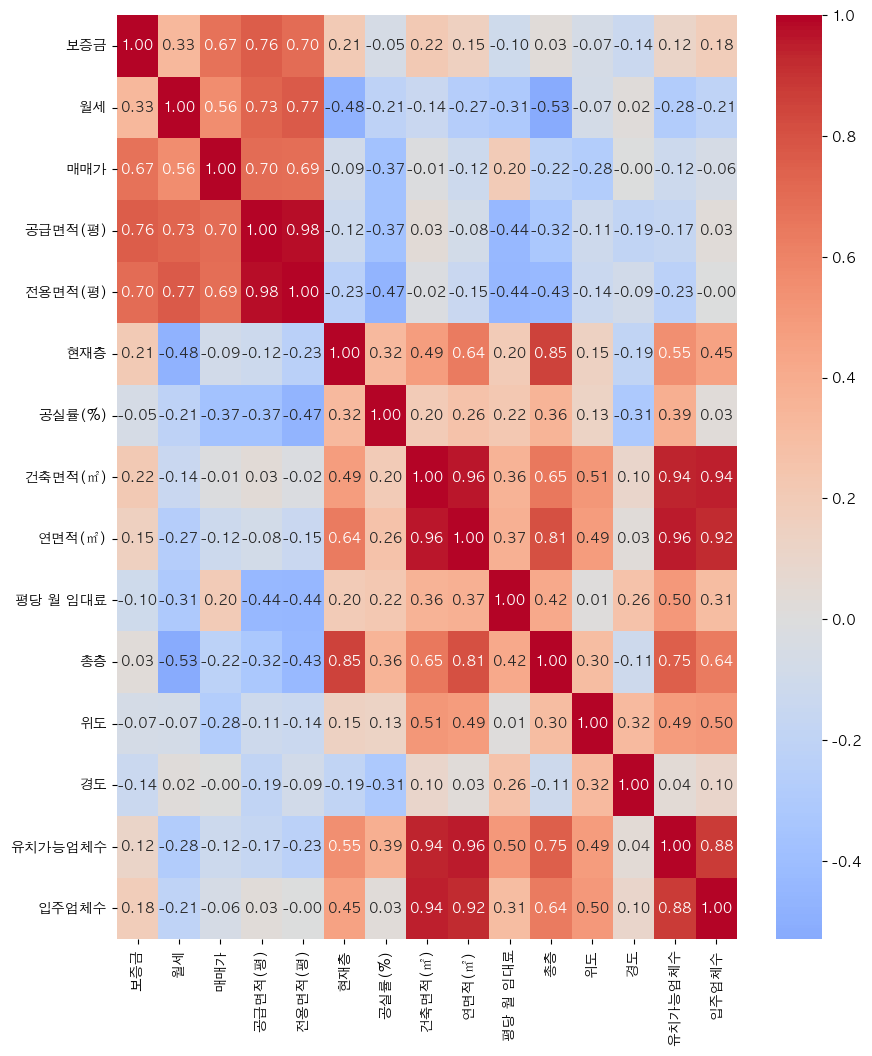

In [150]:
select_df = grouped_df.select_dtypes(include=[np.number])
corr_df = select_df.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0)

ML을 돌리기에는 너무 적은 데이터이다.

공실률 vs. 매매가/월세
→ 공실률이 낮은 곳이 비싼가? -> 공실률이 높을수록 매매가
지식산업센터별 면적 대비 가격
→ 어떤 센터가 가성비 좋은가?
지역별 (의왕 vs. 군포) 차이
→ 의왕과 군포 중 어디가 임대료가 더 높은가?


In [151]:
grouped_df.to_csv('./성남시_데이터.csv', index=False, encoding='utf-8-sig')